In [1]:
av_api_key = "UETDE6D6M3TS37ZG" # free at Alpha Vantage

In [2]:
# if needed, install with "pip install alpha-vantage"
from alpha_vantage.timeseries import TimeSeries
# if needed, install with "pip install matplotlib"
import matplotlib.pyplot as plt
import numpy as np
# must be in same folder as OptionFuncs.py and PlottingFuncs.py
from OptionFuncs import get_returns, Hill, Asq, fit_alpha
import PlottingFuncs as pf
import math
from copy import copy

In [3]:
ts = TimeSeries(key=av_api_key, output_format='pandas')

In [4]:
data, metadata  =  ts.get_daily_adjusted("SPY", outputsize='full')

In [5]:
data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2000-07-12,149.2812,150.1250,148.6875,149.1250,101.9180,5883000.0,0.0000,1.0
2000-07-13,149.9843,150.3750,149.1875,149.7812,102.3665,5356000.0,0.0000,1.0
2000-07-14,150.4375,151.2500,149.6718,151.2500,103.3703,5341900.0,0.0000,1.0
2000-07-17,150.9843,151.9843,150.6875,151.0000,103.1995,4208300.0,0.0000,1.0
2000-07-18,150.6250,150.6250,149.3437,149.7656,102.3558,4262100.0,0.0000,1.0
2000-07-19,149.4687,149.9062,148.2500,148.5625,101.5336,8506800.0,0.0000,1.0
2000-07-20,149.0000,150.6250,148.8125,150.6250,102.9432,4538900.0,0.0000,1.0
2000-07-21,149.7500,149.7500,147.6875,147.6875,100.9356,5656900.0,0.0000,1.0
2000-07-24,148.1250,148.8593,146.5625,146.8437,100.3589,5628500.0,0.0000,1.0


In [6]:
close_data = data['5. adjusted close']

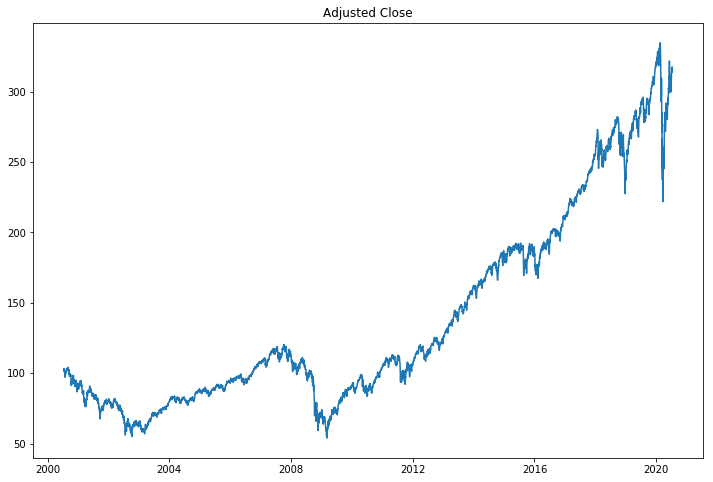

In [7]:
plt.plot(data.index, data['5. adjusted close'])
plt.title("Adjusted Close")
fsize = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(2*fsize)
plt.show()

In [8]:
v = get_returns(close_data)

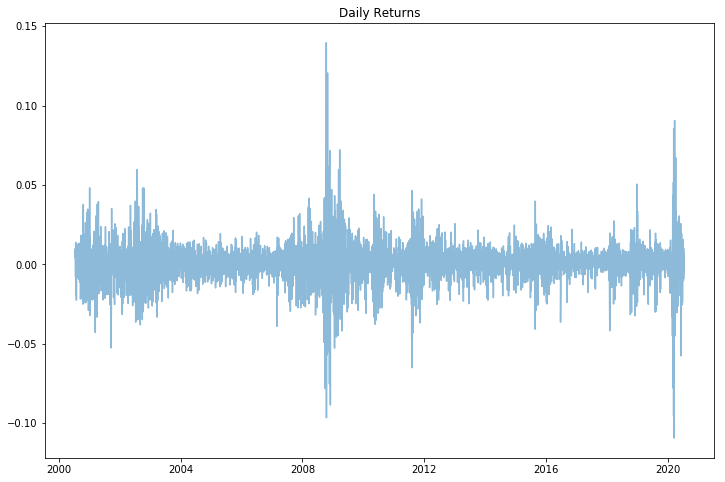

In [9]:
# daily reeturns
plt.plot(data.index[1::], v, alpha=0.5)
fsize = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(2*fsize)
plt.title("Daily Returns")
plt.show()

In [10]:
x3_1 = [data.index[i] for i in range(3,len(data.index),3)]
x3_2 = [data.index[i] for i in range(4,len(data.index),3)]
x3_3 = [data.index[i] for i in range(5,len(data.index),3)]
xx = [x3_1,x3_2,x3_3]

In [11]:
v3_1 = get_returns(close_data, 3)
v3_2 = get_returns(close_data[1:], 3)
v3_3 = get_returns(close_data[2:], 3)
vv = [v3_1,v3_2,v3_3]

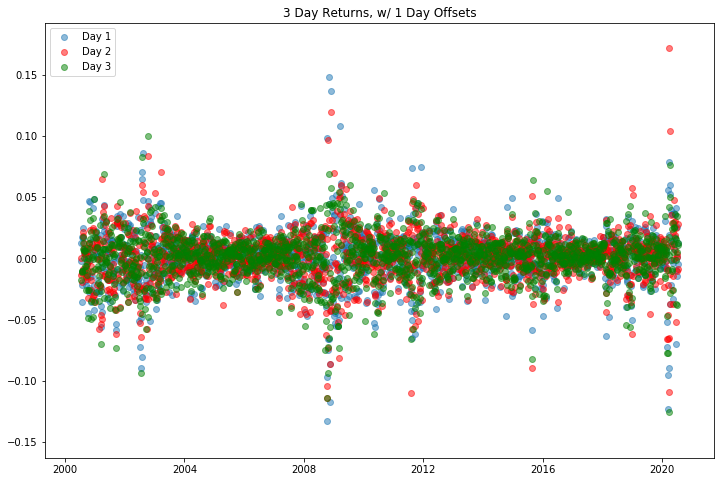

In [12]:
plt.scatter(x3_1, v3_1, alpha=0.5, label="Day 1")
plt.scatter(x3_2, v3_2, color="red", alpha=0.5, label="Day 2")
plt.scatter(x3_3,v3_3, color="green", alpha=0.5, label = "Day 3")
plt.title("3 Day Returns, w/ 1 Day Offsets")
plt.legend(loc="upper left")
fsize = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(2*fsize)
plt.show()

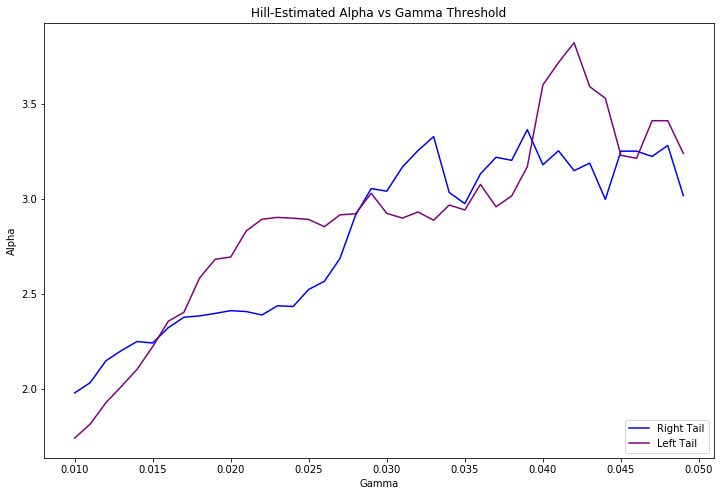

In [13]:
x = [gg*.001 for gg in range(10,50)]
yr = [Hill(v, gamma, "right") for gamma in x]
yl = [Hill(v, gamma, "left") for gamma in x]
plt.plot(x,yr, color="blue", label="Right Tail")
plt.plot(x,yl, color="purple", label = "Left Tail")
plt.title("Hill-Estimated Alpha vs Gamma Threshold")
plt.legend(loc="lower right")
plt.xlabel("Gamma")
plt.ylabel("Alpha")
fsize = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(2*fsize)
plt.show()

In [14]:
y3s = []
for v in [v3_1, v3_2, v3_3]:
    y3s.append([Hill(v, gamma, "left") for gamma in x])

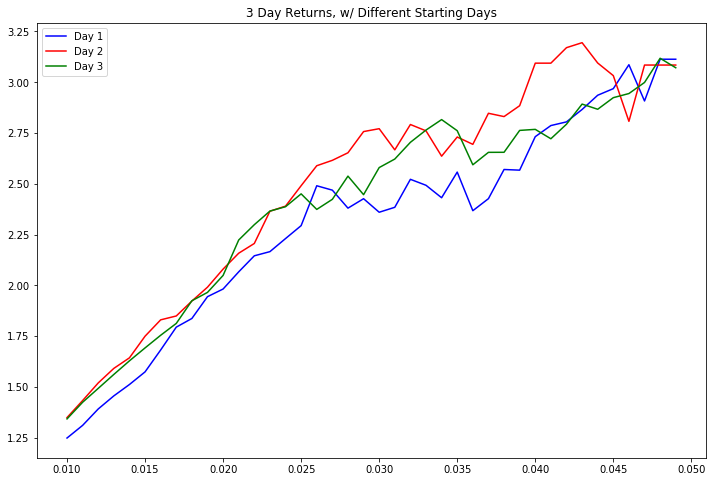

In [15]:
plt.plot(x, y3s[0], color="blue", label="Day 1")
plt.plot(x, y3s[1], color="red", label="Day 2")
plt.plot(x, y3s[2], color="green", label="Day 3")
plt.title("3 Day Returns, w/ Different Starting Days")
plt.legend(loc="upper left")
fsize = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(2*fsize)
plt.show()

In [16]:
# anderson darling --> method to set threshsold gamma for tails
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
# method from here https://arxiv.org/pdf/cond-mat/0411161.pdf


In [17]:
gamma_down, asq_down, alpha_down, n_down = fit_alpha(v, "left", 20)

Fitted alpha stats  left  side is:
alpha ------>  2.7158888577463056
gamma ------>  0.031969171372653545
Asq -------->  0.3134746686617689
n ---------->  77
% of N: ---->  10.9 %


In [18]:
gamma_up, asq_up, alpha_up, n_up = fit_alpha(v, "right", 20)

Fitted alpha stats  right  side is:
alpha ------>  4.3487564314814895
gamma ------>  0.03643908379162124
Asq -------->  0.2967876457694345
n ---------->  51
% of N: ---->  5.3 %


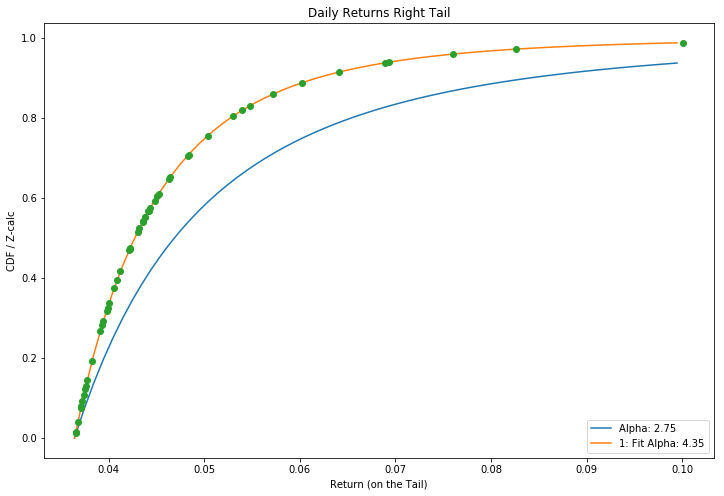

In [19]:
pf.density_plot_fit([(v, gamma_up,alpha_up)], "right", "Daily Returns Right Tail")


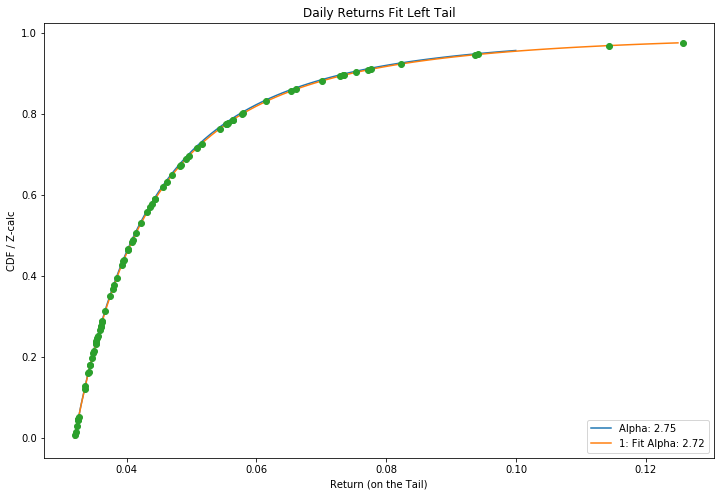

In [20]:
pf.density_plot_fit([(v, gamma_down, alpha_down)], "left", "Daily Returns Fit Left Tail")


In [21]:
rparr = []
for v in vv:
    g,_,a,_ = fit_alpha(v, "right",10, False)
    rparr.append((v, g, a))
    
lparr = []
for v in vv:
    g,_,a,_ = fit_alpha(v, "left", 10, False)
    lparr.append((v, g, a))

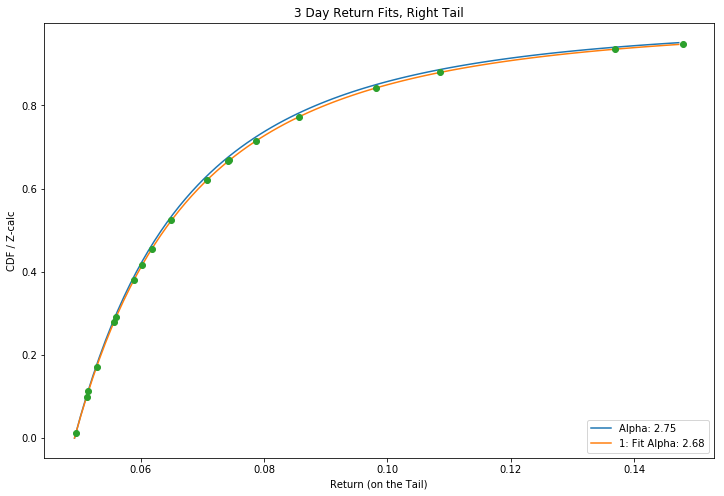

In [22]:
pf.density_plot_fit([rparr[0]], "right", "3 Day Return Fits, Right Tail")

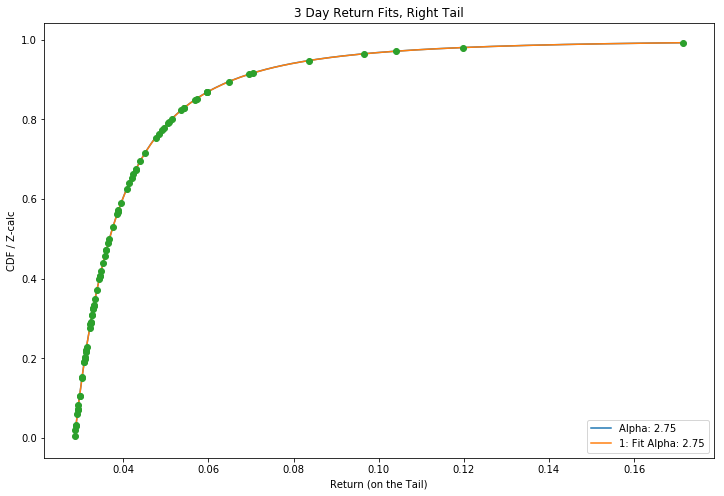

In [23]:
pf.density_plot_fit([rparr[1]], "right", "3 Day Return Fits, Right Tail")

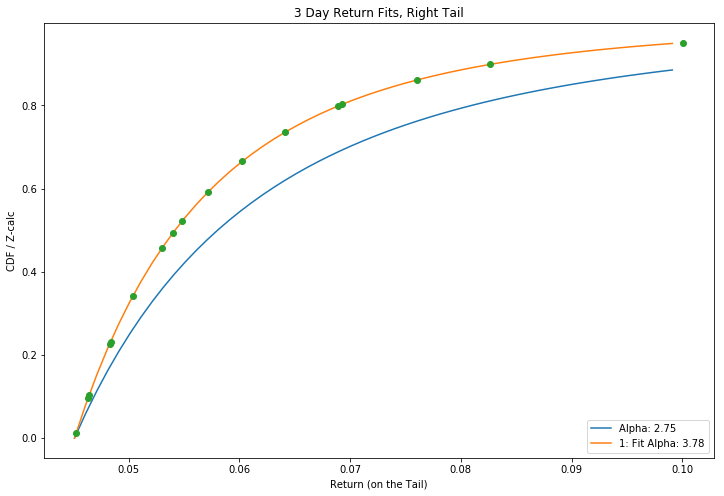

In [24]:
pf.density_plot_fit([rparr[2]], "right", "3 Day Return Fits, Right Tail")

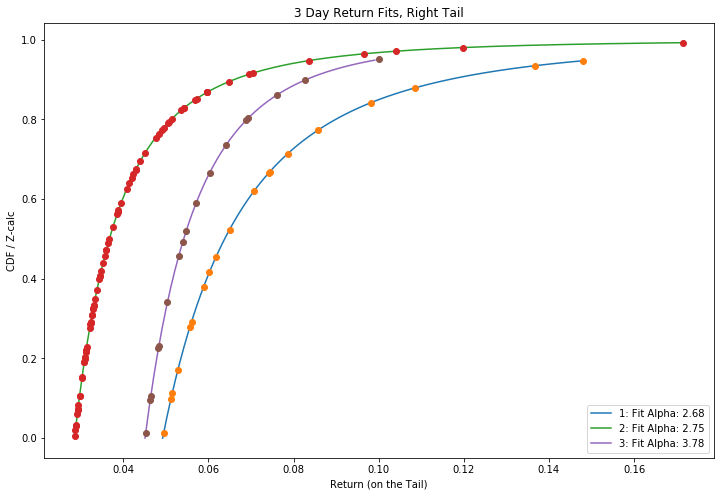

In [25]:
pf.density_plot_fit(rparr, "right", "3 Day Return Fits, Right Tail")

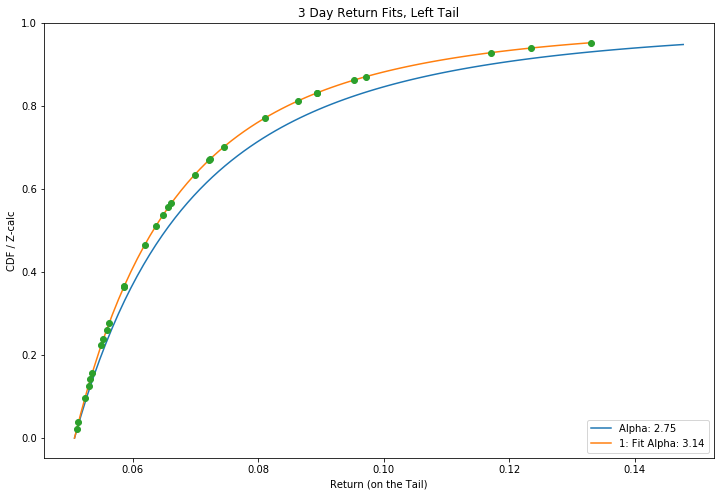

In [26]:
pf.density_plot_fit([lparr[0]], "left", "3 Day Return Fits, Left Tail")

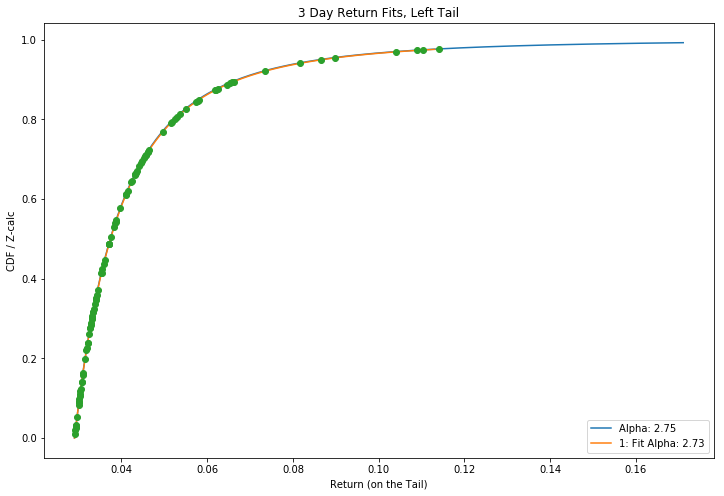

In [27]:
pf.density_plot_fit([lparr[1]], "left", "3 Day Return Fits, Left Tail")

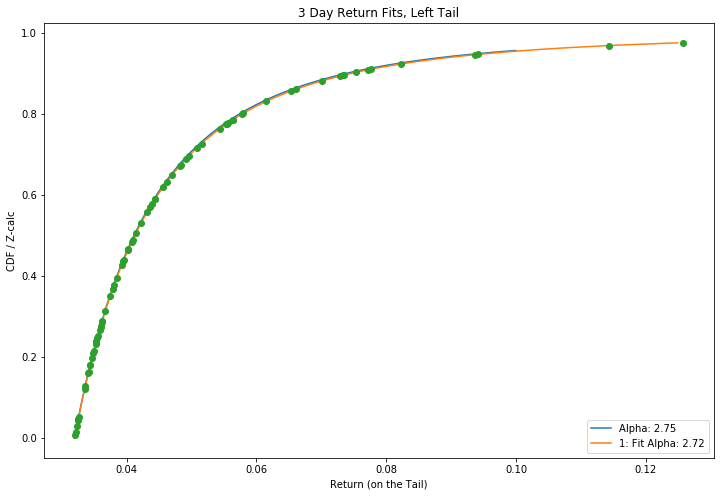

In [28]:
pf.density_plot_fit([lparr[2]], "left", "3 Day Return Fits, Left Tail")

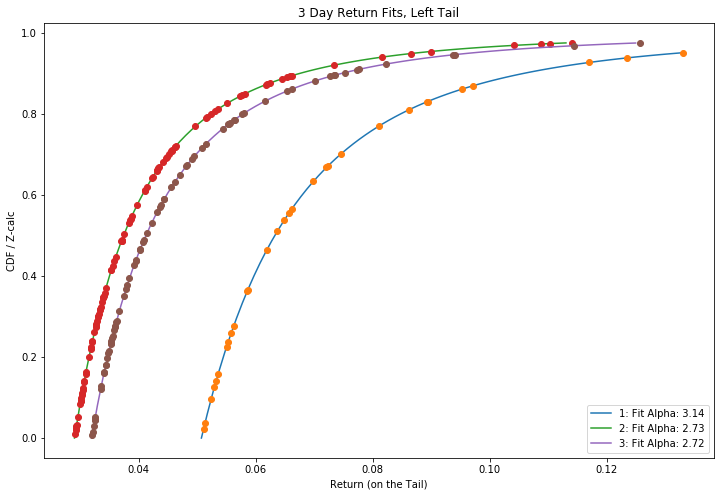

In [29]:
pf.density_plot_fit(lparr, "left", "3 Day Return Fits, Left Tail")

In [30]:
vv10 = []
v10right = []
v10left = []
gamma_x = [gg*.001 for gg in range(10,50)]
for i in range(9):
    v10i = get_returns(close_data[i:], 10)
    vv10.append(v10i)
    aright = [Hill(v10i, gamma, "right") for gamma in gamma_x]
    aleft = [Hill(v10i, gamma, "left") for gamma in gamma_x]
    v10right.append(aright)
    v10left.append(aleft)

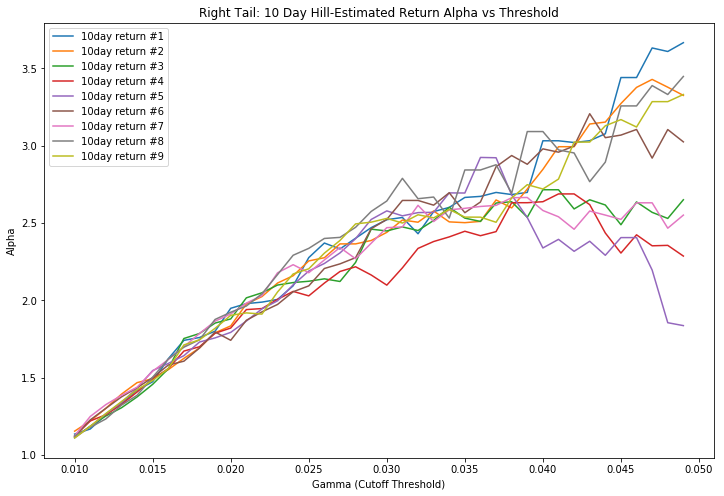

In [31]:
for (i,y) in enumerate(v10right):
    plt.plot(gamma_x, y, label="10day return #{}".format(i+1))
plt.title("Right Tail: 10 Day Hill-Estimated Return Alpha vs Threshold")
plt.legend(loc='upper left')
plt.ylabel("Alpha")
plt.xlabel("Gamma (Cutoff Threshold)")
fsize = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(2*fsize)
plt.show()

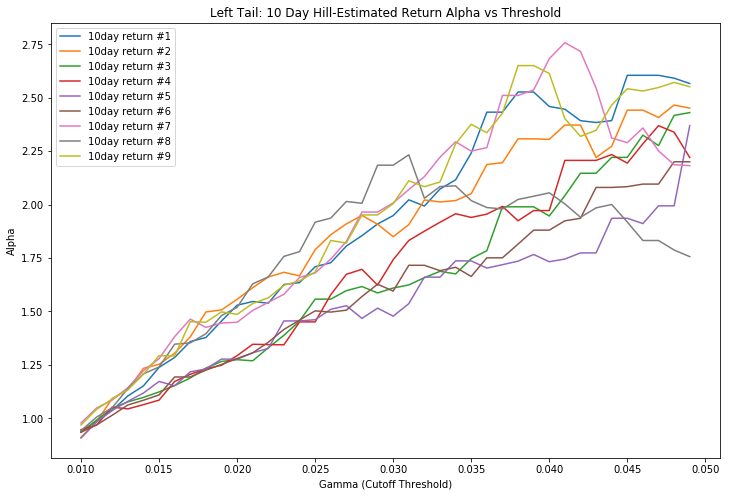

In [32]:
for (i,y) in enumerate(v10left):
    plt.plot(gamma_x, y, label="10day return #{}".format(i+1))
plt.title("Left Tail: 10 Day Hill-Estimated Return Alpha vs Threshold")
plt.legend(loc='upper left')
plt.ylabel("Alpha")
plt.xlabel("Gamma (Cutoff Threshold)")
fsize = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(2*fsize)
plt.show()

In [33]:
rparr10 = []
for v in vv10:
    g,_,a,_ = fit_alpha(v, "right", 10, False)
    rparr10.append((v, g, a))
    
lparr10 = []
for v in vv10:
    g,_,a,_ = fit_alpha(v, "left", 10, False)
    lparr10.append((v, g, a))

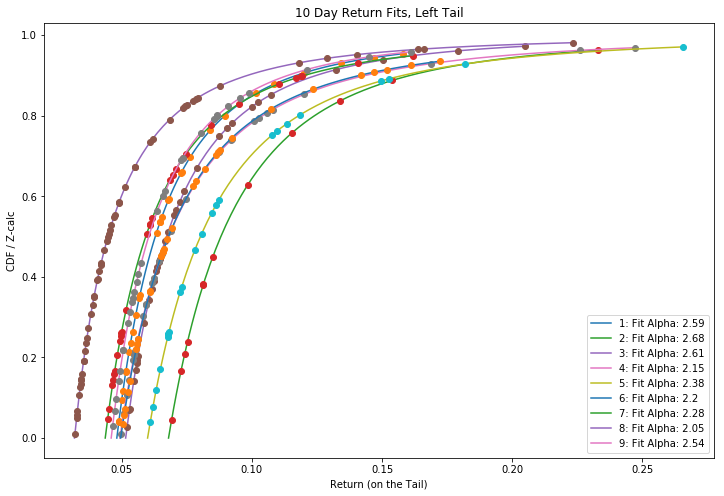

In [34]:
pf.density_plot_fit(lparr10, "left", "10 Day Return Fits, Left Tail")

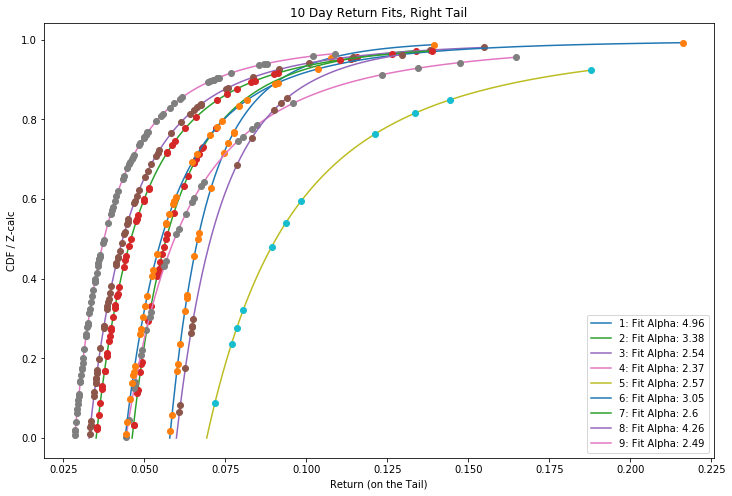

In [35]:
pf.density_plot_fit(rparr10, "right", "10 Day Return Fits, Right Tail")